# Quantum Fourier Transform on Superconducting Qubits (IBM Qiskit)

## Brief Description
This notebook implements the Quantum Fourier Transform (QFT) algorithm on a superconducting qubit architecture using IBM's **Qiskit** framework. The implementation follows the standard definition provided in Nielsen and Chuang's textbook.

We will proceed step by step:
1. **Define** the Quantum Fourier Transform.
2. **Set up** the IBM Qiskit environment.
3. **Build** the QFT helper functions (Hadamard and Controlled-Phase rotations).
4. **Set up** the full QFT circuit.
5. **Illustrate** the circuit diagram.
6. **Execute** the simulation and plot the measurement results.

## 1. QFT Definition
The Quantum Fourier Transform is a linear transformation on quantum qubits, and is the quantum analogue of the discrete Fourier transform.

The mathematical definition is:
$$
QFT|x\rangle = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2\pi i xy / N} |y\rangle
$$
where $N = 2^n$ is the dimension of the Hilbert space for $n$ qubits.

## 2. Setting up IBM Qiskit Platform

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_circuit_layout

# Define the backend simulator (Superconducting architecture simulation)
backend = AerSimulator()
print("Qiskit Environment Set Up Complete.")

Qiskit Environment Set Up Complete.


## 3. Build valid QFT rotation functions

In [ ]:
def qft_rotations(circuit, n):
    """
    Performs the recursive rotations for the QFT circuit.
    Args:
        circuit (QuantumCircuit): The circuit to apply gates to.
        n (int): The number of qubits (or the current qubit index in recursion).
    """
    if n == 0:
        return circuit
    
    n -= 1
    # Apply Hadamard Gate
    circuit.h(n)
    
    # Apply Controlled-Phase (CP) Gates
    # Corresponds to R_k gates in the standard QFT definition
    for qubit in range(n):
        # The angle is pi / 2^(k), where k is the distance between qubits
        angle = np.pi / 2**(n - qubit)
        circuit.cp(angle, qubit, n)
    
    # Recursive call for the next qubit
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    """
    Reverses the order of qubits at the end of the QFT.
    """
    for qubit in range(n // 2):
        circuit.swap(qubit, n - qubit - 1)
    return circuit

## 4. Set up QFT circuit gate

In [ ]:
def make_qft_circuit(n_qubits, input_state_setup=True):
    """
    Constructs the full QFT circuit including input preparation.
    """
    qc = QuantumCircuit(n_qubits)
    
    if input_state_setup:
        qc.x(0) 
        qc.x(2)
    
    qc.barrier() # Visual separator
    
    # Apply QFT Functions
    qft_rotations(qc, n_qubits)
    swap_registers(qc, n_qubits)
    
    # Measurement
    qc.measure_all()
    
    return qc

# Initialize parameters
n_qubits = 4
circuit = make_qft_circuit(n_qubits)

## 5. Illustration graph of the circuit

Circuit Diagram (4 Qubits):


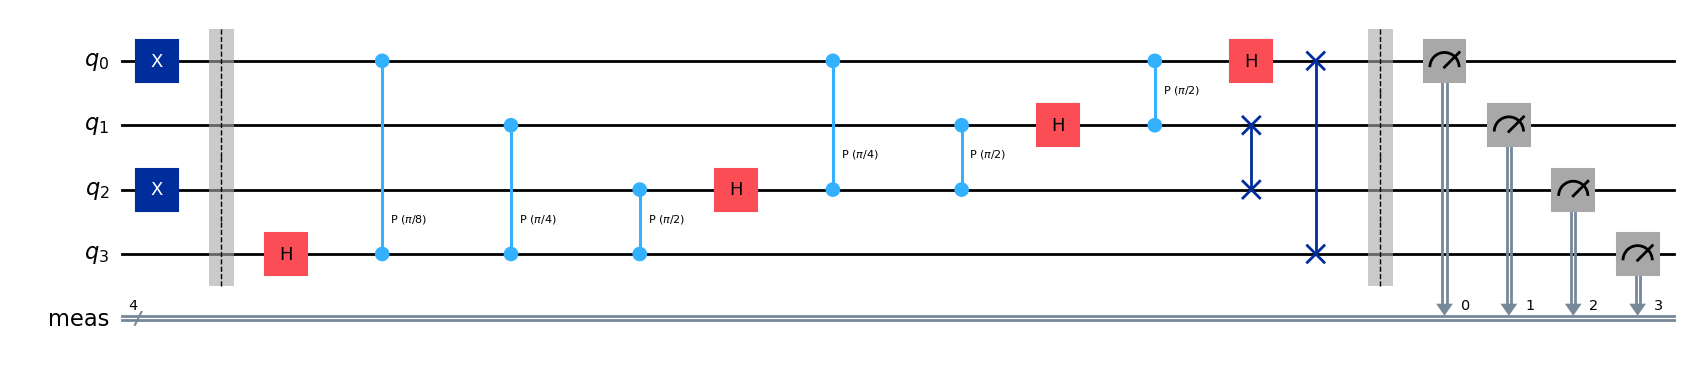

In [ ]:
print(f"Circuit Diagram ({n_qubits} Qubits):")
circuit.draw('mpl')

## 6. Example usage for measurement and plotting

Measurement Counts: {'1011': 69, '1111': 61, '1101': 64, '1000': 63, '0110': 76, '1010': 80, '0100': 62, '0000': 51, '0010': 75, '1110': 50, '0011': 77, '0111': 62, '0001': 59, '0101': 58, '1001': 59, '1100': 58}


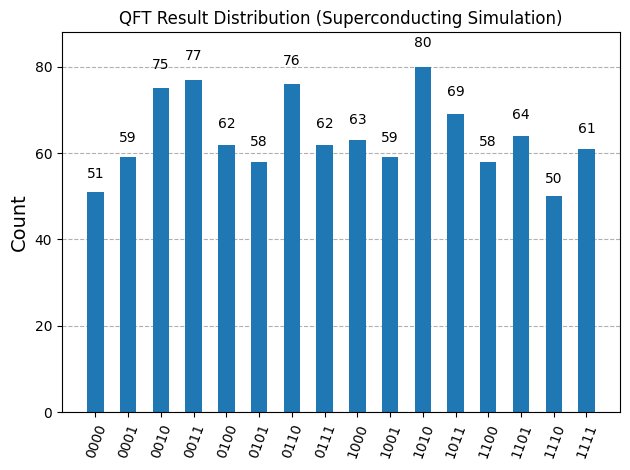

In [ ]:
# Transpile the circuit for the simulator
transpiled_qc = transpile(circuit, backend)

# Execute the experiment
job = backend.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

print(f"Measurement Counts: {counts}")

# Plotting the histogram (similar to the team's result visualization)
plot_histogram(counts, title="QFT Result Distribution (Superconducting Simulation)")

### 7. References
- Nielsen, Michael A., and Isaac L. Chuang. "Quantum Computation and Quantum Information: 10th Anniversary Edition." Cambridge University Press, 2010.
- Qiskit Community Team, "Quantum Fourier Transform," Qiskit Textbook.